In [552]:
#Loading
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
#Modeling
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#Visual
import matplotlib.pyplot as plt
import seaborn as sns
#For TfIdf
from scipy.sparse import csr_matrix, hstack, vstack
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy


from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from cycler import cycler

In [536]:
df = pd.read_csv('piter_filtered.csv')

In [537]:
df

,Latitude,Longitude,City,Area,Address,Rooms,Floor/Total floors,Material,Total area,Live area,Kitchen,Toilet type,Price,Link,Seller,Comment
0,59.911448,30.308232,Санкт-Петербург,Адмиралтейский район,Измайловский пр. 16,1,4/7,СФ,28.8,19.3,3.0,Р,2750,http://www.bn.ru/detail/flats/1133049.html,АН Панорама,"доля, торг, ОС в коммун. кв"
1,59.939095,30.315868,Санкт-Петербург,Адмиралтейский район,Грибоедова кан. наб. 144,1,1/5,СФК,27.0,18.5,4.0,С,3455,http://www.bn.ru/detail/flats/668279.html,Аристократ,ХС. ДГ. Более 3-х лет.
2,59.920230,30.283214,Санкт-Петербург,Адмиралтейский район,Володи Ермака ул. 17,1,1/6,К,42.0,26.0,9.0,Р,3700,http://www.bn.ru/detail/flats/1141100.html,Рудаков-Н,высок эт
3,59.917231,30.284741,Санкт-Петербург,Адмиралтейский район,Садовая ул. 122,1,1/4,К,31.0,16.9,9.0,С,3800,http://www.bn.ru/detail/flats/1182387.html,Итака,"1-27218 ХС, ПП"
4,59.919545,30.280834,Санкт-Петербург,Адмиралтейский район,Псковская ул. 22,1,5/6,К,29.3,16.7,5.0,Р,4000,http://www.bn.ru/detail/flats/1141107.html,Итака,1-22690 ХСб3лБалкВанная
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6207,59.930859,30.361323,Санкт-Петербург,Центральный район,Восстания пл. 32,8,2/5,СФ,250.5,140.0,20.0,Р,24000,http://www.bn.ru/detail/flats/1172850.html,Итака,"9584676, ПП, м/под хостел"
6208,59.932464,30.351801,Санкт-Петербург,Центральный район,Невский пр. 88,9,3/7,СФ,245.3,177.0,16.4,,30000,http://www.bn.ru/detail/flats/1159904.html,Бриз,"89110014455, общая площадь"
6209,59.944098,30.362994,Санкт-Петербург,Центральный район,Кирочная ул. 34,10,3/6,СФ,310.0,270.0,24.0,Р,140000,http://www.bn.ru/detail/flats/1178582.html,частное,ПП срочно
6210,59.932374,30.352492,Санкт-Петербург,Центральный район,Невский пр. 90,12,4/4,СФК,305.0,185.0,0.0,Р,85000,http://www.bn.ru/detail/flats/467001.html,Колвэй,7005005 Видовая на невский


In [538]:
# def del_out(df):
#     print ("Size of df before drop : {}".format(df.shape))
#     before = df.shape[0]

df = df.drop(df[df['Kitchen']>50].index)
df = df.drop(df[df['Price']>30000].index)
df = df.drop(df[df['Price']<1000].index)
df = df.drop(df[df['Live area']>150].index)
df = df.drop(df[df['Total area']>249].index)
df = df.drop(df[df['Rooms']>6].index)
df = df.drop(df[df['Longitude']>32].index)
df = df.drop(df[df['Longitude']<28.7].index)
df = df.drop(df[df['Latitude']<59].index)
df = df.drop(df[df['Latitude']>60.5].index)

# df = df.drop(df[df['Price']>30000].index)
# df = df.drop(df[df['Price']<1000].index)
    
    # return df

In [539]:
def get_one_hot(df, cols):
  df = pd.get_dummies(data = df, columns = cols)
  print ("\nOne_hot for : {} done.".format(cols))

  return df

In [540]:
def prepare_data(data):
  data.drop(['City', 'Floor/Total floors', 'Link', 'Comment', 'Seller', 'Address'], axis = 1, inplace = True)#'Material' 'Address','Seller',
  y = data['Price']
  data.drop('Price', axis = 1, inplace = True)
  
  return data, y

In [541]:
df.tail(10)

,Latitude,Longitude,City,Area,Address,Rooms,Floor/Total floors,Material,Total area,Live area,Kitchen,Toilet type,Price,Link,Seller,Comment
6190,59.938784,30.323126,Санкт-Петербург,Центральный район,Б. Конюшенная ул. 17,5,5/6,СФК,205.0,140.0,17.8,Р,22400,http://www.bn.ru/detail/flats/1159888.html,4ROOMS,Квартира в доме дворянско
6191,59.937157,30.361449,Санкт-Петербург,Центральный район,Ковенский пер. 19,5,4/4,СФК,193.2,91.0,0.0,,23200,http://www.bn.ru/detail/flats/1184276.html,Knight Frank,Светлая кв-ра. Камин
6192,59.935538,30.322677,Санкт-Петербург,Центральный район,Невский пр. 23,5,5/6,СФК,180.4,137.0,10.2,Р,23490,http://www.bn.ru/detail/flats/1172839.html,4ROOMS,Видовая квартира на персп
6193,59.936305,30.353040,Санкт-Петербург,Центральный район,Чехова ул. 1,5,3/4,СФК,170.0,72.0,40.0,2,25600,http://www.bn.ru/detail/flats/701153.html,частное,"2х/ур, ПП, СуперЕвро, камин"
6194,59.926278,30.366839,Санкт-Петербург,Центральный район,Полтавский прд. 2,5,4/7,К/М,181.0,100.0,19.0,Р,26508,http://www.bn.ru/detail/flats/1112072.html,ЛенСпецСМУ,"вид. кв-ра, комфорт"
6197,59.927495,30.373908,Санкт-Петербург,Центральный район,Невский пр. 119,6,2/5,СФ,152.0,113.0,16.6,Д,12100,http://www.bn.ru/detail/flats/1164983.html,М16 - Недвижимость,Предлагается к продаже кв
6198,59.943724,30.359014,Санкт-Петербург,Центральный район,Кирочная ул. 17,6,4/6,СФ,180.0,124.0,18.0,Р,15500,http://www.bn.ru/detail/flats/1143413.html,Центр,"(911) 960-2719, ППвид"
6199,59.929303,30.347237,Санкт-Петербург,Центральный район,Владимирский пр. 15,6,3/5,СФ,160.0,119.0,19.5,Р,17500,http://www.bn.ru/detail/flats/1180549.html,ПЛОЩАДЬ,"2-х сторон. квартира, ВП"
6200,59.935809,30.341425,Санкт-Петербург,Центральный район,Караванная ул.,6,4/4,СФ,162.2,117.0,12.0,Р,17700,http://www.bn.ru/detail/flats/1183159.html,АН Невский Альянс,9551346 золот треуг ПП
6201,59.942291,30.356768,Санкт-Петербург,Центральный район,Рылеева ул. 17,6,5/5,СФК,212.0,144.0,24.0,Р,21000,http://www.bn.ru/detail/flats/1090759.html,ЦАН,"ПП, ХС, 2 стр, Б"


In [542]:
cols = ['Material', 'Area', 'Toilet type']
df = get_one_hot(df, cols)

m_cols = ['Material_1.090.1', 'Material_ДЕР', 'Material_МАН', 'Material_600', 'Material_НЕМ', 'Material_РЕК', 'Material_КТЖ', 'Material_К/М']
df.drop(m_cols, axis=1, inplace = True)


One_hot for : ['Material', 'Area', 'Toilet type'] done.


In [543]:
# df[20:35]
df.iloc[:, 8 : 25]

,Kitchen,Price,Link,Seller,Comment,Material_121,Material_137,Material_504,Material_504Д,Material_600.11,Material_602,Material_606,Material_Б/М,Material_БЛ,Material_БР,Material_ИНД,Material_К
0,3.0,2750,http://www.bn.ru/detail/flats/1133049.html,АН Панорама,"доля, торг, ОС в коммун. кв",0,0,0,0,0,0,0,0,0,0,0,0
1,4.0,3455,http://www.bn.ru/detail/flats/668279.html,Аристократ,ХС. ДГ. Более 3-х лет.,0,0,0,0,0,0,0,0,0,0,0,0
2,9.0,3700,http://www.bn.ru/detail/flats/1141100.html,Рудаков-Н,высок эт,0,0,0,0,0,0,0,0,0,0,0,1
3,9.0,3800,http://www.bn.ru/detail/flats/1182387.html,Итака,"1-27218 ХС, ПП",0,0,0,0,0,0,0,0,0,0,0,1
4,5.0,4000,http://www.bn.ru/detail/flats/1141107.html,Итака,1-22690 ХСб3лБалкВанная,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,16.6,12100,http://www.bn.ru/detail/flats/1164983.html,М16 - Недвижимость,Предлагается к продаже кв,0,0,0,0,0,0,0,0,0,0,0,0
6198,18.0,15500,http://www.bn.ru/detail/flats/1143413.html,Центр,"(911) 960-2719, ППвид",0,0,0,0,0,0,0,0,0,0,0,0
6199,19.5,17500,http://www.bn.ru/detail/flats/1180549.html,ПЛОЩАДЬ,"2-х сторон. квартира, ВП",0,0,0,0,0,0,0,0,0,0,0,0
6200,12.0,17700,http://www.bn.ru/detail/flats/1183159.html,АН Невский Альянс,9551346 золот треуг ПП,0,0,0,0,0,0,0,0,0,0,0,0


In [544]:
df, y = prepare_data(df)

In [545]:
reg = LinearRegression()

In [546]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_score(model.predict(X_test), y_test)

0.7728311247039833

In [547]:
mean_squared_error(model.predict(X_test), y_test)

2499814.6562520037

In [548]:
df

,Latitude,Longitude,Rooms,Total area,Live area,Kitchen,Material_121,Material_137,Material_504,Material_504Д,...,Area_Центральный район,Toilet type_2,Toilet type_3,Toilet type_,Toilet type_Б/В,Toilet type_В/К,Toilet type_Д,Toilet type_Д/К,Toilet type_Р,Toilet type_С
0,59.911448,30.308232,1,28.8,19.3,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,59.939095,30.315868,1,27.0,18.5,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,59.920230,30.283214,1,42.0,26.0,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,59.917231,30.284741,1,31.0,16.9,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,59.919545,30.280834,1,29.3,16.7,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,59.927495,30.373908,6,152.0,113.0,16.6,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6198,59.943724,30.359014,6,180.0,124.0,18.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6199,59.929303,30.347237,6,160.0,119.0,19.5,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6200,59.935809,30.341425,6,162.2,117.0,12.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


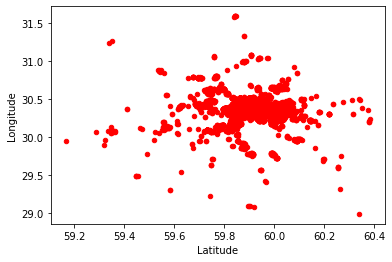

In [549]:
ax1 = df.plot.scatter(x='Latitude', y='Longitude', c='Red')
# [df['Latitude']>50]

C:\Users\tuska\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.640e+07, tolerance: 7.068e+06
  model = cd_fast.enet_coordinate_descent(


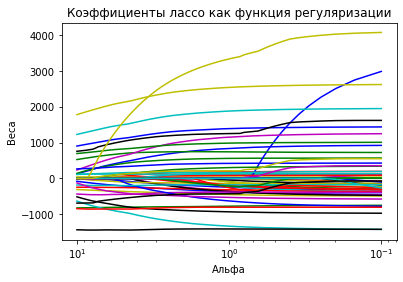

In [553]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("Альфа")
plt.ylabel("Веса")
plt.title("Коэффициенты лассо как функция регуляризации")
plt.axis("tight")
plt.show();

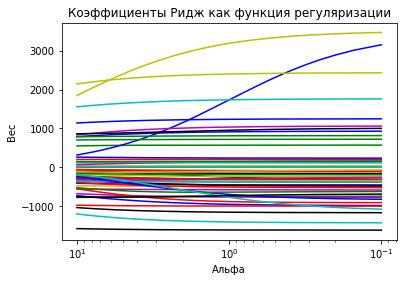

In [554]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
model = Ridge()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("Альфа")
plt.ylabel("Вес")
plt.title("Коэффициенты Ридж как функция регуляризации")
plt.axis("tight")
plt.show()